## Ch05_Q08 in p227
We will now perform cross-validation on a simulated data set.

## Part(a)
Generate a simulated data set as follows:  
  
`rng = np.random.default_rng(1)`  
`x = rng.normal(size=100)`  
`y = x - 2 * x**2 + rng.normal(size=100)`  
   
In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [1]:
import numpy as np

# Generating the simulated data
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In the simulated dataset generated in Part (a):

- **\( n \)** represents the number of observations in the dataset, which is \( n = 100 \) as we have 100 samples for \( x \) and \( y \).
- **\( p \)** represents the number of predictors or features. In this case, we have only one predictor, \( x \), so \( p = 1 \).

### Model Equation
The model used to generate \( y \) based on \( x \) can be written as: $y = x-2x^2+\epsilon$

where:
- **\( x \)** is generated from a standard normal distribution.
- $ \epsilon \sim N(0, 1) $ is a normally distributed error term with mean 0 and variance 1, also generated from the standard normal distribution.

This equation captures the relationship between \( x \) and \( y \) in this dataset, with a non-linear component due to the $ -2x^2$ term.

## Part(b)
Create a scatterplot of X against Y . Comment on what you find.

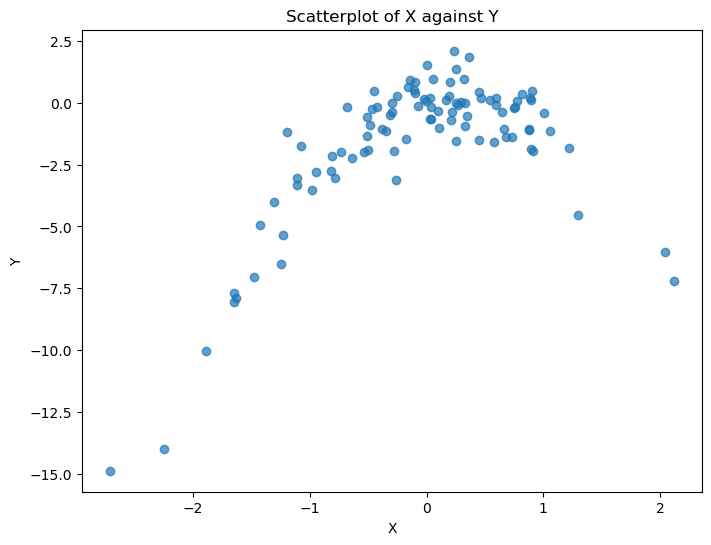

In [2]:
import matplotlib.pyplot as plt

# Scatter plot of X against Y
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X against Y")
plt.show()

### Observations from the Scatterplot
- The scatterplot of \( X \) against \( Y \) shows a **non-linear, parabolic relationship**.
- **\( Y \) increases** as \( X \) moves toward zero, reaches a **peak**, and then **decreases** as \( X \) becomes positive.
- This pattern aligns with the **quadratic term \( -2x^2 \)** in the model, which introduces the curvature.
- The **spread around the curve** is due to the random noise term $\epsilon$.

## Part(c)
Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:  
  
i. $Y = \beta_0 + \beta_1X + \epsilon$

ii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$

iii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

iv. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$  
  
Note you may find it helpful to use the `data.frame()` function to create a single data set containing both X and Y .

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(1)

# Create a DataFrame containing both X and Y
data = pd.DataFrame({'X': x, 'Y': y})

# Define a function to compute LOOCV error for a given polynomial degree
def loocv_error(degree):
    # Prepare features with polynomial terms up to the specified degree
    X_poly = np.vander(data['X'], degree + 1, increasing=True)  # increasing=True gives [X^0, X^1, ..., X^degree]
    loo = LeaveOneOut()
    errors = []

    # Perform LOOCV
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = data['Y'].values[train_index], data['Y'].values[test_index]
        
        # Fit the model using least squares
        model = LinearRegression().fit(X_train, y_train)
        
        # Predict and calculate the error for this test point
        y_pred = model.predict(X_test)
        errors.append((y_test - y_pred) ** 2)
    
    # Return the average LOOCV error
    return np.mean(errors)

# Compute LOOCV errors for each model (degree 1 to 4)
degrees = [1, 2, 3, 4]
loocv_errors = {f'Degree {d}': loocv_error(d) for d in degrees}


# Display the LOOCV errors for each model
loocv_errors

{'Degree 1': 6.633029839181981,
 'Degree 2': 1.1229368563419688,
 'Degree 3': 1.3017965489358838,
 'Degree 4': 1.332394269417932}

## Part(d)
Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [4]:
# Repeat Part (c) with a new random seed
np.random.seed(42)  # Set a different random seed

# Re-compute LOOCV errors for each model (degree 1 to 4) using the new seed
new_loocv_errors = {f'Degree {d}': loocv_error(d) for d in degrees}

# Display the LOOCV errors with the new seed for comparison
new_loocv_errors

{'Degree 1': 6.633029839181981,
 'Degree 2': 1.1229368563419688,
 'Degree 3': 1.3017965489358838,
 'Degree 4': 1.332394269417932}

### Answer:
- **Yes, the results are the same as in (c).**
  
- **Why?**
  - We only changed the random seed without regenerating the data, so the dataset remained unchanged.
  - LOOCV errors are based on the specific data; if the data stays the same, the results will also stay the same.
  
- **To see different results**, we would need to regenerate the data after changing the seed.

## Part(e)
Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

### Answer:
- The model with **Degree 2** (quadratic model) had the smallest LOOCV error of **1.1229**.

### Is this expected?
Yes, this result aligns with our expectations. The data generation model was defined as  $y = x-2x^2+\epsilon$ , which is a quadratic relationship. Therefore, a quadratic model should provide the best fit, as it directly matches the underlying structure of the data. Higher-degree models (Degrees 3 and 4) introduce unnecessary complexity, which may slightly increase the error due to overfitting, while the linear model (Degree 1) is too simple to capture the curvature in the data.

## Part(f)
Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [5]:
import statsmodels.api as sm
# Define a function to retrieve p-values for a given polynomial degree
def get_pvalues(data, degree):
    # Add polynomial terms to the data up to the specified degree
    X_poly = np.vander(data['X'], degree + 1, increasing=True)
    X_poly = sm.add_constant(X_poly)  # Add intercept term
    y = data['Y']
    
    # Fit the model using statsmodels OLS
    model = sm.OLS(y, X_poly).fit()
    
    # Retrieve p-values for coefficients
    return model.pvalues

pvalues_dict = {f'Degree {d}': get_pvalues(data, d) for d in degrees}
print("P-values for each model:\n")
for degree, pvalues in pvalues_dict.items():
    print(f"{degree} Model:")
    for term, pvalue in pvalues.items():
        print(f"  {term}: {pvalue:.5e}")  # Display p-value in scientific notation with 5 decimal places
    print("\n")

P-values for each model:

Degree 1 Model:
  const: 4.40962e-08
  x1: 1.03651e-09


Degree 2 Model:
  const: 5.42824e-01
  x1: 1.49491e-11
  x2: 1.34007e-39


Degree 3 Model:
  const: 6.34502e-01
  x1: 4.44852e-08
  x2: 3.96891e-37
  x3: 2.87202e-01


Degree 4 Model:
  const: 4.59605e-01
  x1: 2.59130e-05
  x2: 2.39603e-19
  x3: 6.42491e-01
  x4: 2.31066e-02




### Answer:
Yes, the p-values confirm the cross-validation results:

1. **Degree 1 Model**: Both terms are significant, but the model is too simple, leading to a higher LOOCV error.

2. **Degree 2 Model**: \( X \) and \( $X^2$ \) are highly significant, matching the lowest LOOCV error and best fit for the data’s quadratic relationship.

3. **Degree 3 Model**: \( $X^3$ \) is not significant, indicating overfitting, which aligns with the slightly higher LOOCV error.

4. **Degree 4 Model**: \( $X^3$ \) and \( $X^4$ \) are mostly insignificant, supporting that added terms don’t improve fit and may overfit.

In summary, both p-values and LOOCV agree: the Degree 2 model is optimal.